# **Experiment Number:- 03**

### **AIM:-**

Implement k_NN from scratch in Python to classify Iris flowers, varying k to observe accuracy changes.

**import Library**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

**Iris Dataset**

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 1234)

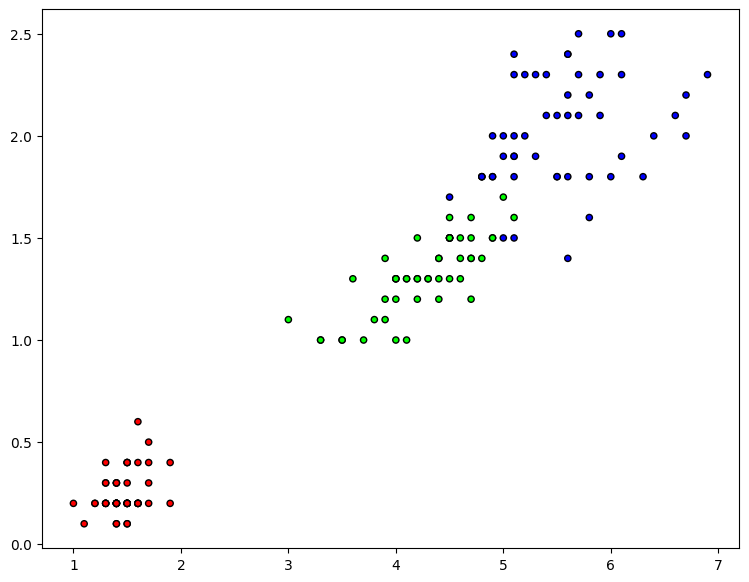

In [3]:
plt.figure(figsize=(9,7))
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.scatter(x= X[:,2], y= X[:,3], c=y, cmap =cmap, edgecolors='k', s=20)
plt.show()

## **KNN(k-nearest neighbors)**

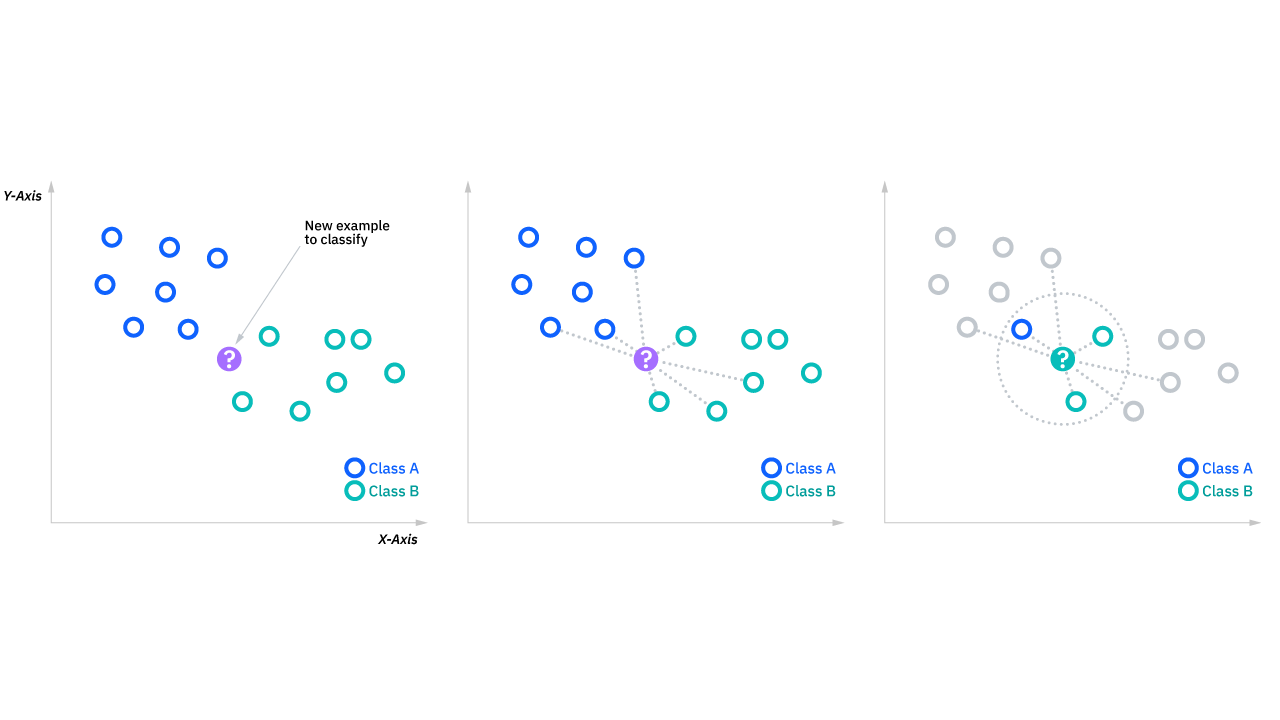

In [4]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  return distance

class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X ,y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return np.array(predictions)

  def _predict(self, x):
    # compute the distance
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    # get the closest k
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # majority vote
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

In [5]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(f"Model predictions: {predictions}")

Model predictions: [1 2 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


**Accuracy**

In [6]:
accuracy = np.sum(predictions == y_test)/ len(y_test)
print(f"Accuracy: {round(accuracy, 2)}")

Accuracy: 0.97


**Confusion_matrix**

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  8]])

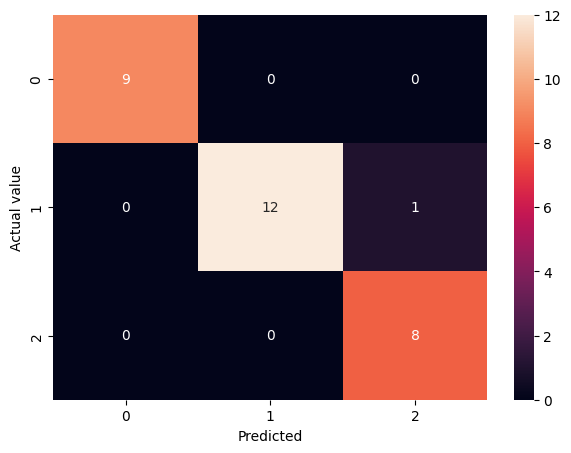

In [8]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual value")
plt.show()

In [9]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

